<a href="https://colab.research.google.com/github/YashDewan/BasicDataSc/blob/main/MLProjects/EndTEndML_project(BASIC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-California-Housing-Prices/master/Data/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [94]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [95]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [96]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [97]:
from sklearn.model_selection import train_test_split

In [98]:
x = housing.drop("median_house_value" ,axis=1)
y = housing["median_house_value"]

In [99]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25 , random_state=0)

In [100]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
19226,-122.68,38.46,19.0,4976.0,711.0,1926.0,625.0,7.3003,<1H OCEAN
14549,-117.24,32.95,18.0,1591.0,268.0,547.0,243.0,5.9547,NEAR OCEAN
9093,-118.27,34.68,19.0,552.0,129.0,314.0,106.0,3.2125,INLAND
12213,-117.18,33.51,13.0,270.0,42.0,120.0,42.0,6.9930,<1H OCEAN
12765,-121.41,38.62,21.0,3260.0,763.0,1735.0,736.0,2.5162,INLAND
...,...,...,...,...,...,...,...,...,...
13123,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND
19648,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND
9845,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN
10799,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN


In [101]:
housing.corr()["median_house_value"].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

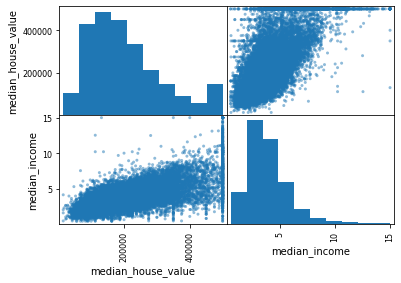

In [102]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
attributes = ["median_house_value","median_income"]
scatter_matrix(housing[attributes])
plt.show()

In [103]:
housing["total_bedrooms"].fillna(housing["total_bedrooms"].median(),inplace=True)

In [104]:
# features create : 
housing.head()
housing["rooms_per_household"] = housing['total_rooms']/housing["households"]
housing["rooms_per_bedroom"] = housing['total_rooms']/housing["total_bedrooms"]
housing["population_per_household"] = housing['population']/housing["households"]

In [105]:
housing.corr()["median_house_value"].sort_values(ascending = False)

median_house_value          1.000000
median_income               0.688075
rooms_per_bedroom           0.367217
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
Name: median_house_value, dtype: float64

In [106]:
housing.isna().sum()

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
ocean_proximity             0
rooms_per_household         0
rooms_per_bedroom           0
population_per_household    0
dtype: int64

In [107]:
# encoders : strs to int 
from sklearn.preprocessing import OrdinalEncoder
encode = OrdinalEncoder()
housing_encode = encode.fit_transform(housing[['ocean_proximity']])
housing_encode

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

In [108]:
encode.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [109]:
housing_num = housing.drop("ocean_proximity",axis=1)

In [110]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [111]:
#pipline :
num_pipeline = Pipeline([
  ("imputer" , SimpleImputer(strategy="median")),
  ("std-scaler" , StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num.isna().sum()
# dff = pd.DataFrame(housing_num_tr)
# dff

longitude                   0
latitude                    0
housing_median_age          0
total_rooms                 0
total_bedrooms              0
population                  0
households                  0
median_income               0
median_house_value          0
rooms_per_household         0
rooms_per_bedroom           0
population_per_household    0
dtype: int64

In [112]:
#transformer : 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attributes = list(housing_num)
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
  ("num" , num_pipeline,num_attributes),
  ("cat" , OneHotEncoder(),cat_attributes)
])

housing_prepared = full_pipeline.fit_transform(housing)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,rooms_per_bedroom,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,6.821705,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,6.418626,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,7.721053,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,5.421277,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,5.810714,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,4.451872,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,4.646667,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,4.647423,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,4.547677,2.123209


In [113]:
housing_labels = housing['median_house_value']
housing_labels

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

In [114]:
x_train,x_test,y_train,y_test=train_test_split(housing_prepared,housing_labels,test_size=0.33,random_state=42)

In [115]:
from sklearn.linear_model import LinearRegression
model1 = LinearRegression()

In [116]:
model1.fit(x_train,y_train)

LinearRegression()

In [117]:
model1.score(x_test,y_test)

1.0

In [119]:
y_predict = model1.predict(x_test)
y_predict

array([ 47700.,  45800., 500001., ..., 107000., 130700., 307100.])

In [120]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15316    166100.0
14772     93600.0
12870    107000.0
13476    130700.0
16123    307100.0
Name: median_house_value, Length: 6812, dtype: float64

In [122]:
# applying 2nd model : 
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor()

In [123]:
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [124]:
model2.score(x_test,y_test)

0.9999980684905407

In [125]:
y_pred = model2.predict(x_test)
y_pred

array([ 47700.,  45500., 500001., ..., 107000., 130700., 307100.])

In [126]:
y_test

20046     47700.0
3024      45800.0
15663    500001.0
20484    218600.0
9814     278000.0
           ...   
15316    166100.0
14772     93600.0
12870    107000.0
13476    130700.0
16123    307100.0
Name: median_house_value, Length: 6812, dtype: float64